# Statistical Analysis and Data Viualization of the Iris Dataset Using Python

#### Libraries used:
- `Pandas`: Pandas is a library that facilitates the manipulation and analysis of structured or tabular data.
- `Matplotlib`: Matplotlib is a library for creating graphics and data visualization in general.
- `Sklearn`: Scikit-learn is an open-source library containing tools for machine learning, such as functions for data preprocessing, model creation, results evaluation, etc.
- `OpenCV` or `cv2` - OpenCV, also known as cv2, is a widely used open-source library for image and video processing in Python. It offers a wide range of functions and algorithms that enable easy and efficient computer vision tasks.
- `Numpy` - NumPy is a library in the Python programming language that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions/operations.


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import cv2
import numpy as np

#### Data Sampling

In [56]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### Boxplot

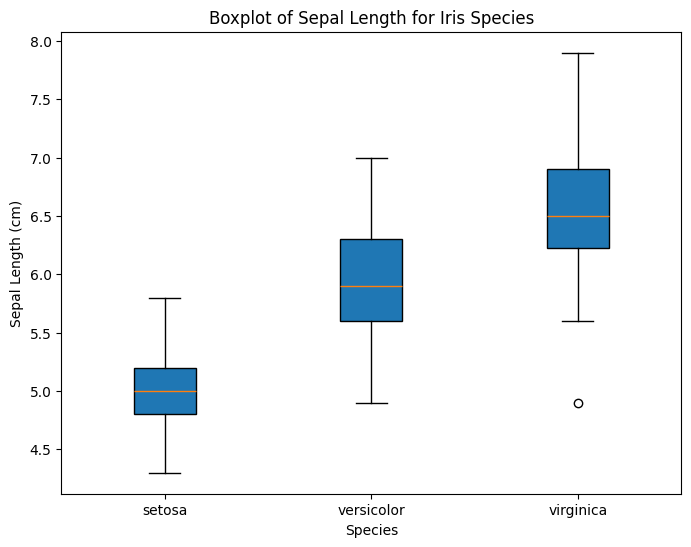

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot([iris_data[iris.target == i]["sepal length (cm)"] for i in range(3)], tick_labels=iris.target_names, patch_artist=True)
plt.title("Boxplot of Sepal Length for Iris Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

#### Maximum

In [58]:
maximum_petal_length = iris_data["petal length (cm)"].max()
print(f"Maximum petal length: {maximum_petal_length:.2f} cm")

Maximum petal length: 6.90 cm


#### Minimum

In [59]:
minimum_sepal_length = iris_data["sepal length (cm)"].min()
print(f"Minimum sepal length: {minimum_sepal_length:.2f} cm")

Minimum sepal length: 4.30 cm


#### Range

In [60]:
minimum_petal_length = iris_data["petal length (cm)"].min()
range_petal_length = maximum_petal_length - minimum_petal_length
print(f"Range for Petal Length: {range_petal_length:.2f} cm")


Range for Petal Length: 5.90 cm


#### Data Percentile

In [61]:
print("\nPercentiles for Petal Length:")
print(f"Setosa: {np.percentile(iris_data[iris.target == 0]['petal length (cm)'], np.arange(0, 100, 25))}")
print(f"Versicolor: {np.percentile(iris_data[iris.target == 1]['petal length (cm)'], np.arange(0, 100, 25))}")
print(f"Virginica: {np.percentile(iris_data[iris.target == 2]['petal length (cm)'], np.arange(0, 100, 25))}")


Percentiles for Petal Length:
Setosa: [1.    1.4   1.5   1.575]
Versicolor: [3.   4.   4.35 4.6 ]
Virginica: [4.5   5.1   5.55  5.875]


#### Histogram

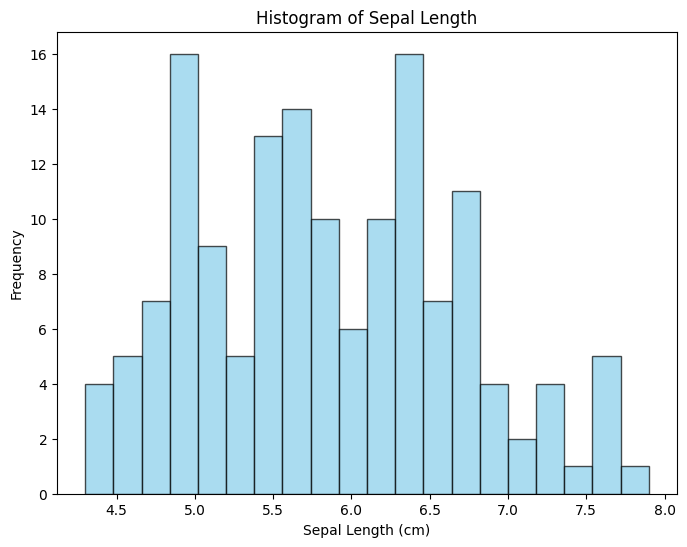

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(iris_data["sepal length (cm)"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

#### Cumulative Histogram

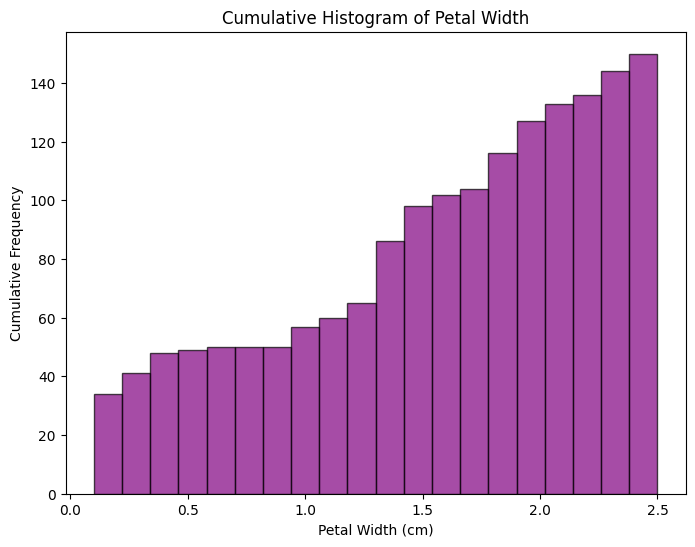

In [63]:
plt.figure(figsize=(8, 6))
plt.hist(iris_data["petal width (cm)"], bins=20, cumulative=True, color="purple", edgecolor="black", alpha=0.7)
plt.title("Cumulative Histogram of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Cumulative Frequency")
plt.show()

#### Histogram of Sepal Width

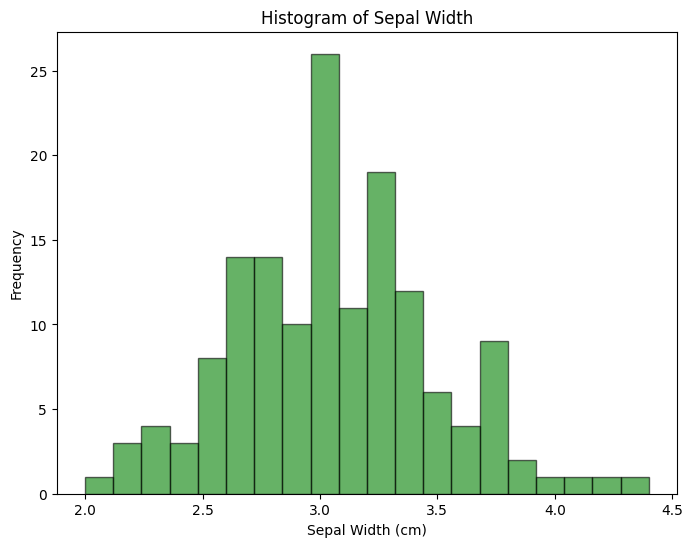

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(iris_data["sepal width (cm)"], bins=20, color="green", edgecolor="black", alpha=0.6)
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

#### Image Histogram

In [65]:
image_path = "iris.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

##### Manual Histogram

In [66]:
hist_manual = np.zeros(256, dtype=int)
for pixel_value in image.flatten():
    hist_manual[pixel_value] += 1

hist_opencv = cv2.calcHist([image], [0], None, [256], [0, 256])


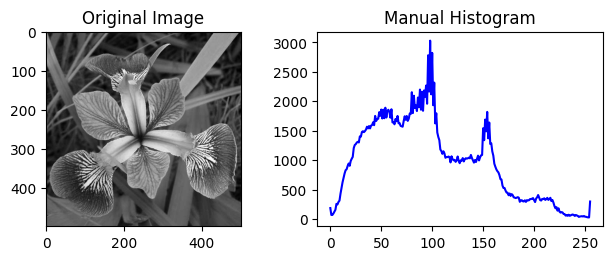

In [67]:
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.plot(hist_manual, color="blue")
plt.title("Manual Histogram")
plt.tight_layout()
plt.show()

##### Inverted image and Histogram

In [68]:
inverted_image = 255 - image
inverted_hist = cv2.calcHist([inverted_image], [0], None, [256], [0, 256])


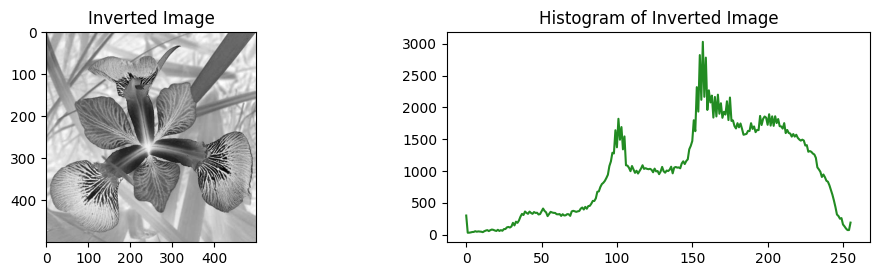

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.imshow(inverted_image, cmap="gray")
plt.title("Inverted Image")
plt.subplot(2, 2, 4)
plt.plot(inverted_hist, color="forestgreen")
plt.title("Histogram of Inverted Image")
plt.show()